# Decision Trees Using SKLearn

Implemented by Pratham Shah (240962070)

### Imports

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

### Reading the CSV file

In [132]:
original = pd.read_csv("Threats (1).csv")
data = original.copy()

### Frequency Encoding for Characteristic Data

SKLearn doesn't accept characteristic data into its decision tree model yet

In [133]:
unique_ids = {}

def unique_item_code (item):
    if item != "":
        sum_of_ords = sum([ord(val) for val in item])
        length = len(item)
        ord_first = ord(item[0])
        ord_last = ord(item[-1])
        unique_id = sum_of_ords+length+ord_first*2+ord_last
    else: unique_id = 1

    if unique_id not in unique_ids.keys():
        unique_ids[unique_id] = item

    return unique_id

def frequency_encoding(columns):
    global data
    for col in columns:
        data[col + '_freq'] = [unique_item_code(item) for item in data[col].values]
        data.drop(col, axis=1, inplace=True)
frequency_encoding(["proto", "service", "state", "attack_cat"])
titles = list(data)[1:-1]

data.head()

,Unnamed: 0,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto_freq,service_freq,state_freq,attack_cat_freq
0,40000,40001,0.012996,16,18,1540,1644,2539.242797,31,29,...,0,0,5,7,0,0,674,181,442,887
1,40001,40002,0.004119,12,12,1064,2260,5583.879675,31,29,...,0,0,3,8,0,0,674,181,442,887
2,40002,40003,0.000988,2,2,146,178,3036.437382,31,29,...,0,0,7,2,0,0,678,643,439,887
3,40003,40004,3.415787,230,238,24344,29556,136.718127,31,29,...,0,0,4,1,0,0,674,671,442,887
4,40004,40005,0.193943,72,74,4238,63618,747.642372,31,29,...,0,0,6,12,0,0,674,181,442,887


### K-Fold Cross-Validation

(10 folds)
To find the general accuracy of the model when given new data

In [134]:
kf = KFold(n_splits=10, shuffle=False)

accuracy_list = []
X= data[titles].values
y= data['attack_cat_freq'].values

clf = DecisionTreeClassifier(min_samples_leaf=int(len(data)/300))

n= 0
print("Cross validation for each fold:")
for train_index, test_index in kf.split(X, y):
    clf.fit(X[train_index], y[train_index])
    score = clf.score(X[test_index], y[test_index])
    accuracy_list.append(score)
    print("\nModel iteration {0}:".format(n+1))
    train_predictions = clf.predict(X[train_index])
    train_accuracy = accuracy_score(y[train_index], train_predictions)
    test_predictions = clf.predict(X[test_index])
    total_predictions = clf.predict(X)
    total_accuracy = accuracy_score(y, total_predictions)
    print("Accuracies on:\nTraining Data: {0}\nTesting Data (Score): {1}\nTotal Data: {2}".format(train_accuracy, score, total_accuracy))
    n += 1

Cross validation for each fold:

Model iteration 1:
Accuracies on:
Training Data: 0.8099436809352577
Testing Data (Score): 0.8995197635759143
Total Data: 0.8189018848685912

Model iteration 2:
Accuracies on:
Training Data: 0.8256996724326188
Testing Data (Score): 0.7277966602630412
Total Data: 0.8159094435536903

Model iteration 3:
Accuracies on:
Training Data: 0.8257981889382383
Testing Data (Score): 0.725580020688636
Total Data: 0.8157764461619169

Model iteration 4:
Accuracies on:
Training Data: 0.8282118433259172
Testing Data (Score): 0.7020836411999409
Total Data: 0.8155991163062191

Model iteration 5:
Accuracies on:
Training Data: 0.8221448685215136
Testing Data (Score): 0.7470814245603665
Total Data: 0.8146385795878559

Model iteration 6:
Accuracies on:
Training Data: 0.8220053034718858
Testing Data (Score): 0.7526230234963794
Total Data: 0.8150671267391256

Model iteration 7:
Accuracies on:
Training Data: 0.8100930160007225
Testing Data (Score): 0.8554750997487809
Total Data: 0

### The Final Model

The model's general accuracy for new data will be 81.28646407583598%. It's score here is 81.74832460230085%. Here's a visualisation of the decision tree:


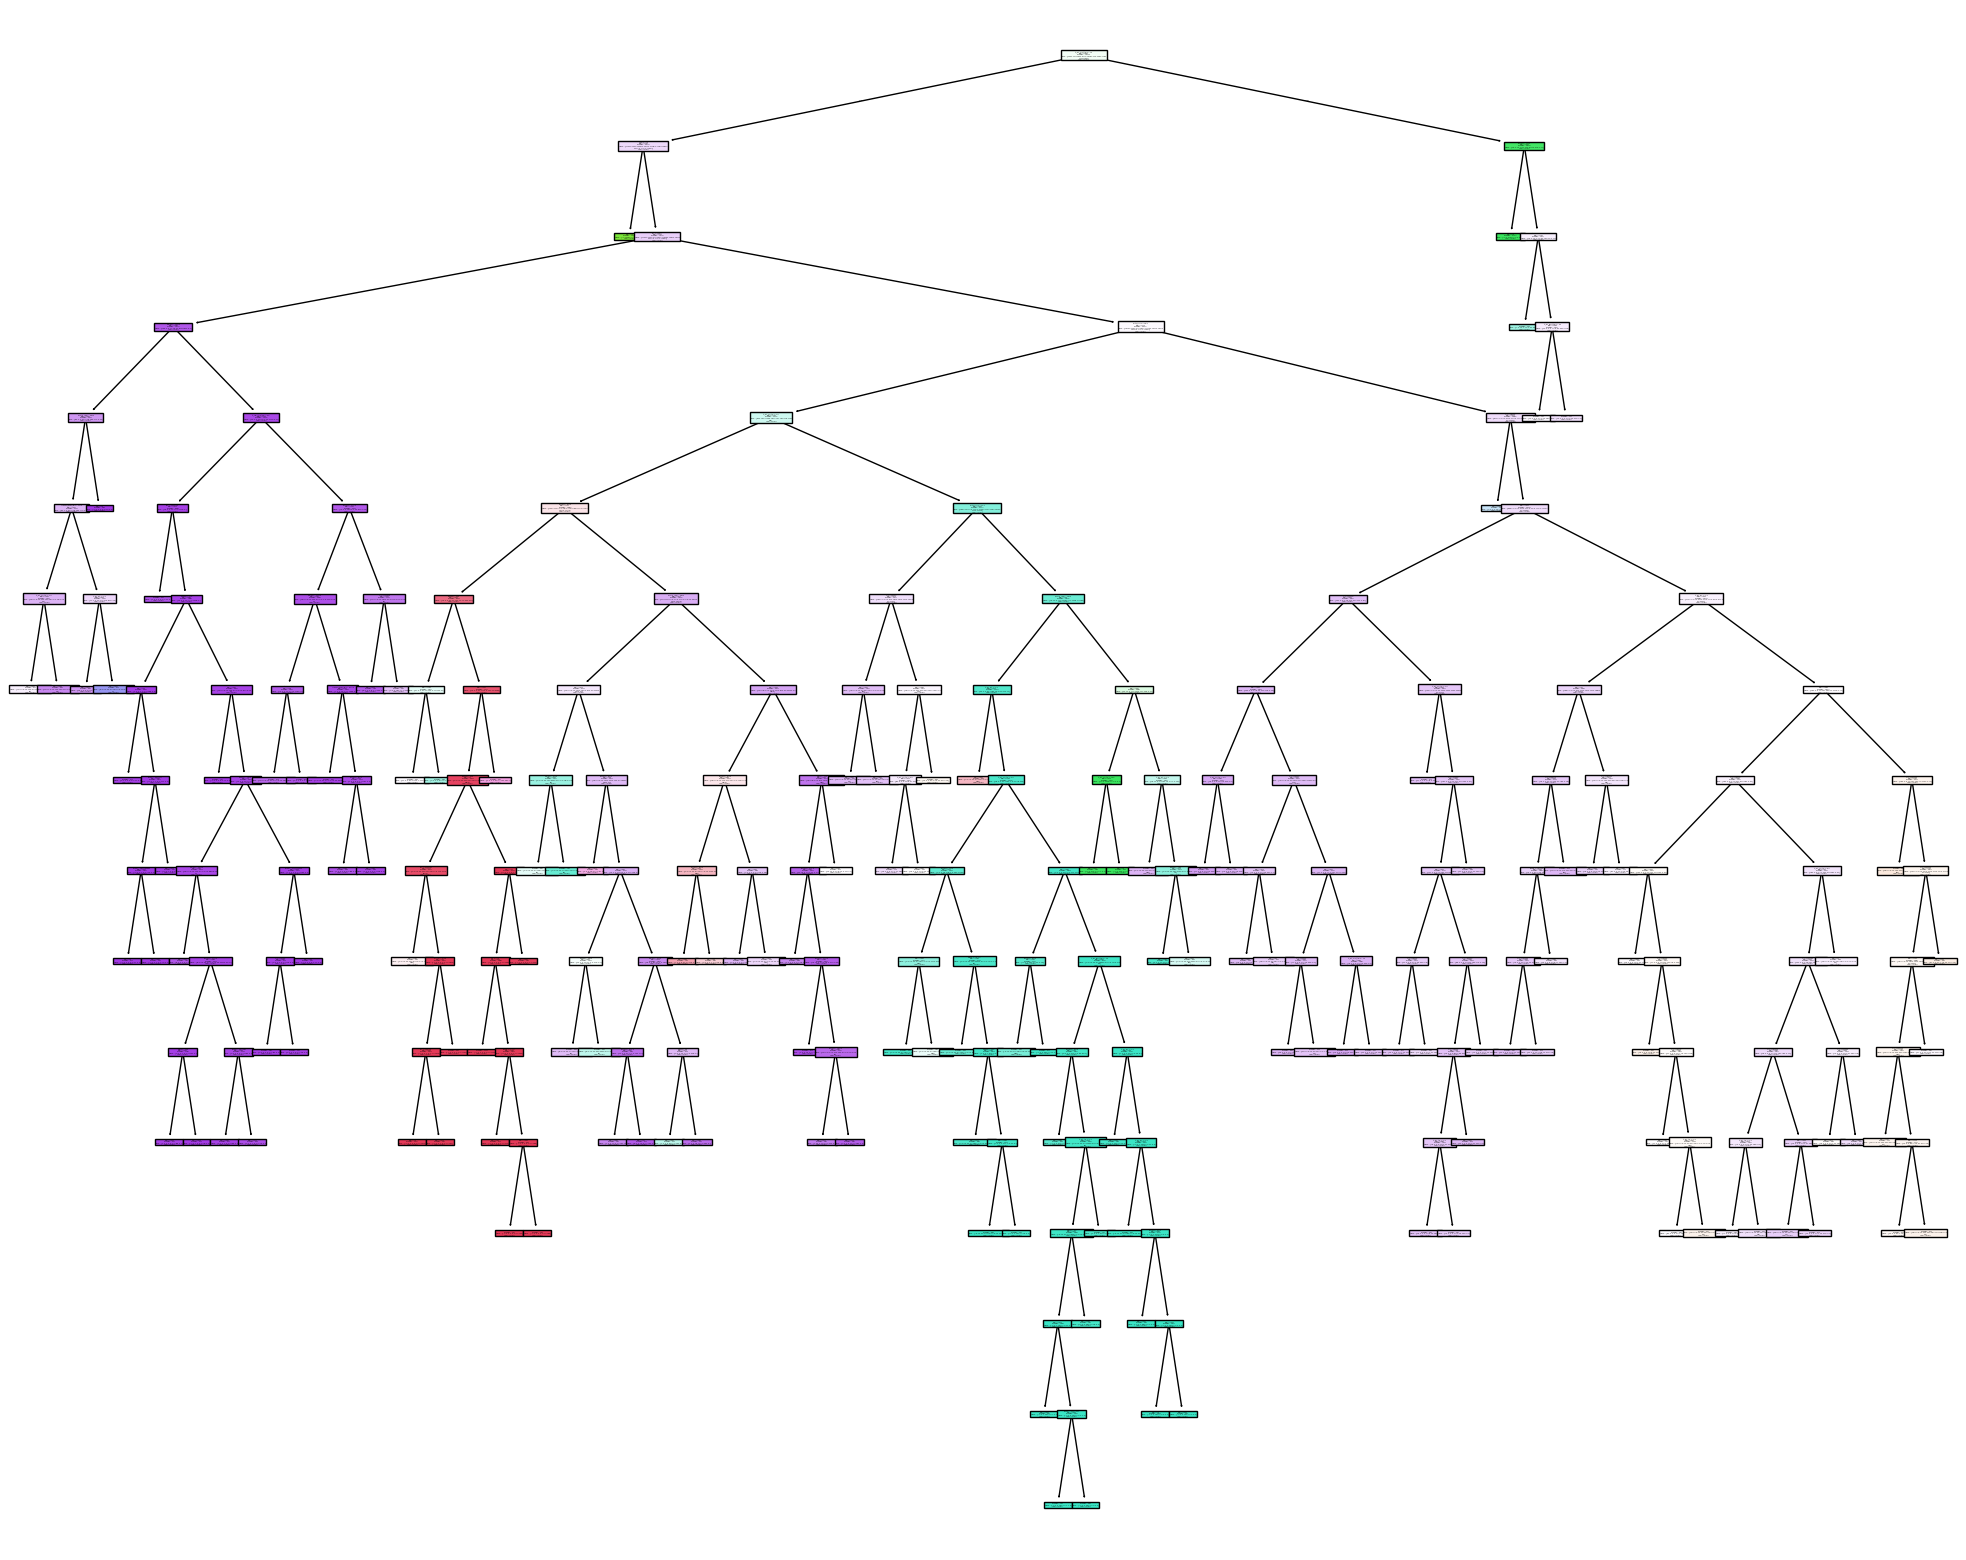

In [ ]:
clf.fit(X, y)
score = clf.score(X, y)

print("The model's general accuracy for new data will be {0}%. It's score here is {1}%. Here's a visualisation of the decision tree:".format((sum(accuracy_list)/len(accuracy_list))*100, score*100))

classes =  list(map(lambda x: unique_ids[x],data['attack_cat_freq']))

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=titles, class_names=classes, filled=True)

### Key Data

For categorical analysis

In [136]:

for item in unique_ids.keys():
    print("{0} : {1}".format(item, unique_ids[item]))


674 : tcp
678 : udp
632 : arp
768 : ospf
755 : igmp
627 : ddp
1172 : ipv6-frag
743 : cftp
695 : wsn
681 : pvp
1152 : wb-expak
670 : mtp
1016 : pri-enc
1050 : sat-mon
713 : cphb
933 : sun-nd
921 : iso-ip
703 : xtp
533 : il
792 : unas
1031 : mfe-nsp
466 : 3pc
1314 : ipv6-route
757 : idrp
601 : bna
888 : swipe
1329 : kryptolan
763 : cpnx
803 : rsvp
946 : wb-mon
807 : vmtp
513 : ib
630 : dgp
854 : eigrp
618 : ax.25
762 : gmtp
770 : pnni
673 : sep
660 : pgm
1243 : idpr-cmtp
663 : rvd
957 : mobile
769 : narp
506 : fc
759 : pipe
976 : ipcomp
983 : ipv6-no
1256 : sat-expak
1222 : ipv6-opts
682 : snp
766 : ipcv
1276 : br-sat-mon
691 : ttp
654 : tcf
1361 : nsfnet-igp
1372 : sprite-rpc
1084 : aes-sp3-d
1184 : sccopmce
788 : sctp
692 : qnx
790 : scps
1074 : etherip
744 : aris
662 : pim
1437 : compaq-peer
810 : vrrp
756 : iatp
688 : stp
718 : l2tp
686 : srp
565 : sm
731 : fire
679 : ptp
690 : sps
785 : skip
646 : any
760 : ipip
838 : encap
754 : ifmp
593 : tp++
561 : a/n
657 : ipv6
923 : i-nlsp
787

### Conclusion

The data is heavily skewed towards Normal. Finding cyberattack leafs here is proving to be extraordinarily hard. Nevertheless, a decently accurate model has been developed, keeping overfitting prevention in mind. 